# Plotting Auto Debt payments 

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()
import seaborn as sns
sns.set_context('notebook') 
sns.set_style('ticks')

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
# importing the data set with FECHA_PAGO as index, and parse_date means we are using pandas' datetime function
df = pd.read_csv('auto_debt.csv', sep=',', encoding='utf-8', index_col='FECHA_PAGO', parse_dates=True)
df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
1900-01-01,20130000000017031068,C,21.00,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,20130000000017880233,D,0.02,01/01/1900,PAO,030,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-11,20130000000017262878,D,66.31,01/01/1900,PAO,130,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-24,20130000000021722038,C,19.02,01/01/1900,MAJ,507,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-01,20130000000016110860,D,21.84,01/01/1900,NULO,600,14/05/2014,2014.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data wrangling: 
### TIPO_ORIGEN = PAO 
### TIPO_MOVIMIENTO = C 
### And six seperate data frames for the six different OBN_CUOTA types: 0, 10, 20, 50, 51, 90

In [4]:
# We only want origen (PAO)
origen_df = df.groupby('MCC_TIPO_ORIGEN')
pao_df = origen_df.get_group('PAO')
pao_df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-11-04,20130000000017880233,D,0.02,01/01/1900,PAO,030,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-11,20130000000017262878,D,66.31,01/01/1900,PAO,130,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,20130000000017880233,C,1943.40,01/01/1900,PAO,701,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-09,20130000000016633320,C,378.00,01/01/1900,PAO,701,05/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# We only want tipo C (credito)
pao_tipo = pao_df.groupby('MCC_TIPO_MOVIMIENTO')
pao_credito_c = pao_tipo.get_group('C')
pao_credito_c.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-11-04,20130000000017880233,C,1943.40,01/01/1900,PAO,701,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-09,20130000000016633320,C,378.00,01/01/1900,PAO,701,05/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-24,20130000000021722038,C,605.50,01/01/1900,PAO,901,24/06/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-11,20130000000017262878,C,66.31,01/01/1900,PAO,CPI,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# seperate for cuota categories (10),(20),(0),(50) (51) (90)
pao_credito_cuota = pao_credito_c.groupby('OBN_CUOTA')
pao_credito_cuota.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-11-04,20130000000017880233,C,1943.40,01/01/1900,PAO,701,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-09,20130000000016633320,C,378.00,01/01/1900,PAO,701,05/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-24,20130000000021722038,C,605.50,01/01/1900,PAO,901,24/06/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-11,20130000000017262878,C,66.31,01/01/1900,PAO,CPI,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-11,20130000000017262878,C,525.00,01/01/1900,PAO,CPP,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130000000013727888,C,16.87,01/01/1900,PAO,132,15/04/2019,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130030003873028861,C,6.19,01/01/1900,PAO,132,15/04/2019,2014.0,50.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130000000013727888,C,14.49,01/01/1900,PAO,136,15/04/2019,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

# On the left we have handles for the six different cuota categories, e.g. "pao_credito_10"
pao_credito_0 = pao_credito_cuota.get_group(0.0)
pao_credito_10 = pao_credito_cuota.get_group(10.0)
pao_credito_20 = pao_credito_cuota.get_group(20.0)
pao_credito_50 = pao_credito_cuota.get_group(50.0)
pao_credito_51 = pao_credito_cuota.get_group(51.0)
pao_credito_90 = pao_credito_cuota.get_group(90.0)
# Let's look at one of them
pao_credito_10.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-11-04,20130000000017880233,C,1943.40,01/01/1900,PAO,701,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130000000013727888,C,16.87,01/01/1900,PAO,132,15/04/2019,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130000000013727888,C,14.49,01/01/1900,PAO,136,15/04/2019,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,20130000000013727888,C,12.88,01/01/1900,PAO,CAC,15/04/2019,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sorted_0 = pao_credito_0.sort_values('FECHA_PAGO')
sorted_10 = pao_credito_10.sort_values('FECHA_PAGO')
sorted_20 = pao_credito_20.sort_values('FECHA_PAGO')
sorted_50 = pao_credito_50.sort_values('FECHA_PAGO')
sorted_51 = pao_credito_51.sort_values('FECHA_PAGO')
sorted_90 = pao_credito_90.sort_values('FECHA_PAGO')
sorted_10.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
2014-01-10,20130000000012326828,C,43.47,01/01/1900,PAO,130,01/10/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10,20130000000012326828,C,315.00,01/01/1900,PAO,CAC,01/10/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-17,20130000000018676823,C,38.55,01/01/1900,PAO,901,17/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-21,20130000000018768881,C,752.98,01/01/1900,PAO,601,21/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-30,20130000000018781216,C,636.93,01/01/1900,PAO,901,30/01/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sorted_10.index

DatetimeIndex(['2014-01-10', '2014-01-10', '2014-01-17', '2014-01-21',
               '2014-01-30', '2014-04-15', '2014-04-15', '2014-04-22',
               '2014-04-22', '2014-04-22',
               ...
               '2019-12-04', '2019-12-04', '2019-12-04', '2019-12-04',
               '2019-12-04', '2019-12-04', '2019-12-04', '2019-12-04',
               '2019-12-04', '2019-12-04'],
              dtype='datetime64[ns]', name=u'FECHA_PAGO', length=523, freq=None)

# The Graphs

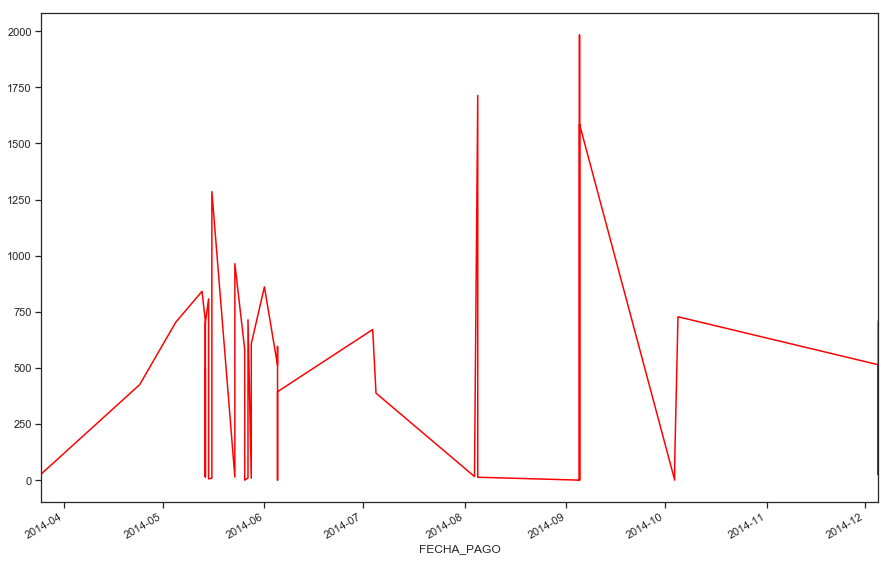

In [10]:
# Tracking payments on debt paid with cuota 0
sorted_0['MCC_IMPORTE'].plot(color='red')

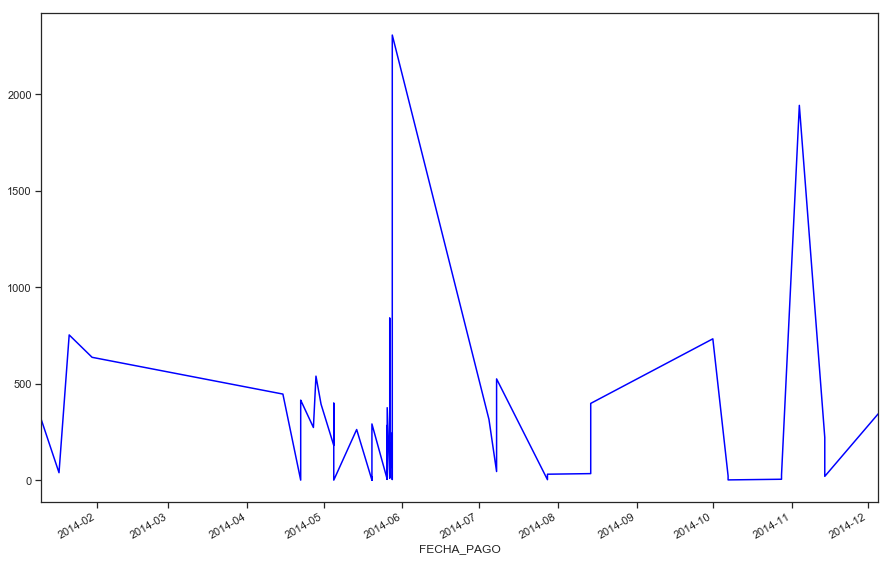

In [11]:
# Tracking payments on debt paid with cuota 10
sorted_10['2014']['MCC_IMPORTE'].plot(color='blue')

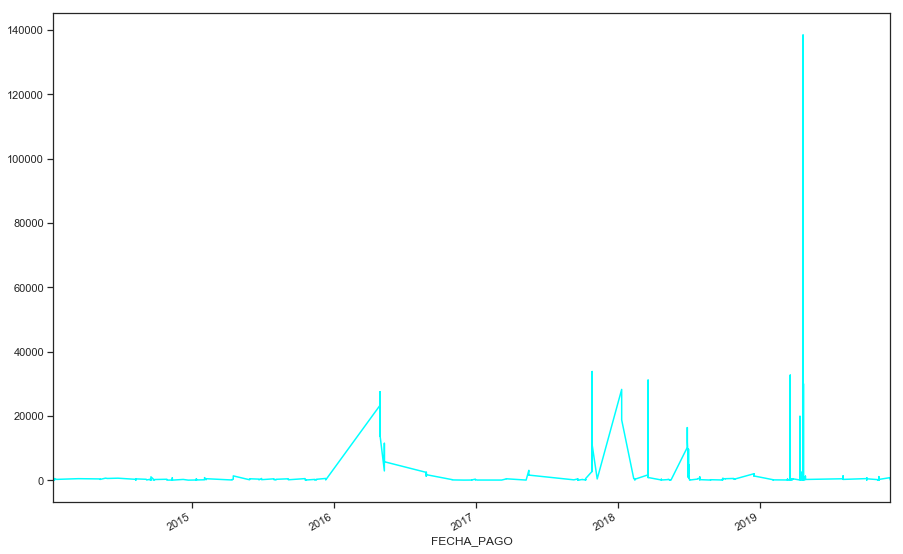

In [12]:
# Tracking payments on debt paid with cuota 20
sorted_20['MCC_IMPORTE'].plot(color='cyan')

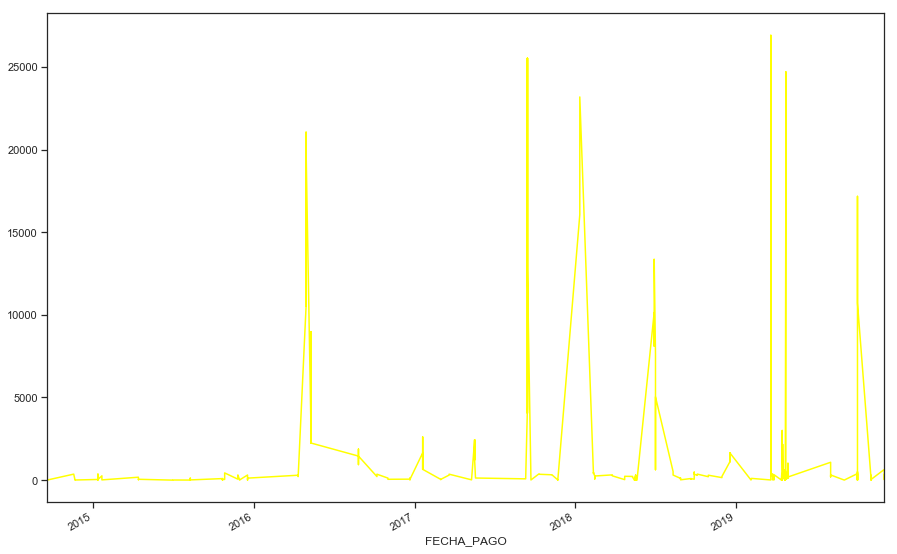

In [13]:
# Tracking payments on debt paid with cuota 50
sorted_50['MCC_IMPORTE'].plot(color='yellow')

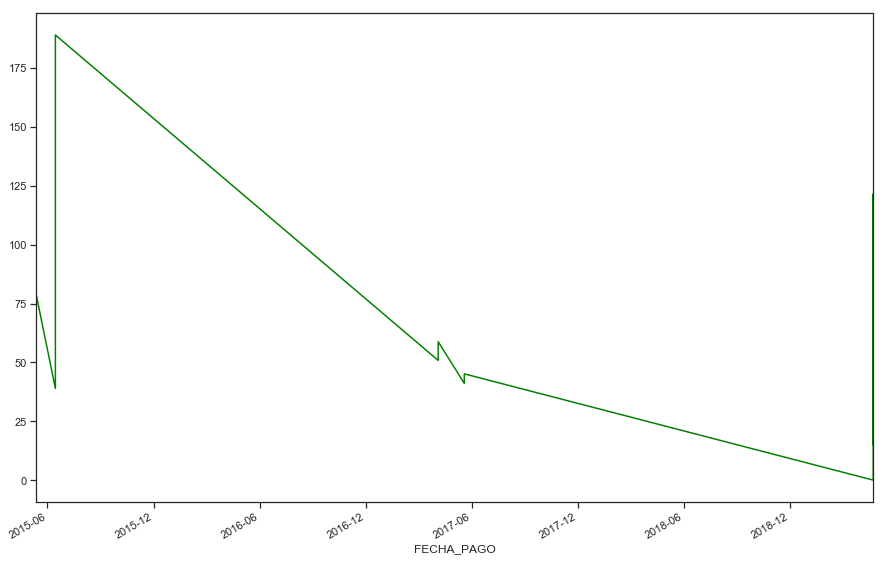

In [14]:
# Tracking payments on debt paid with cuota 51
sorted_51['MCC_IMPORTE'].plot(color='green')

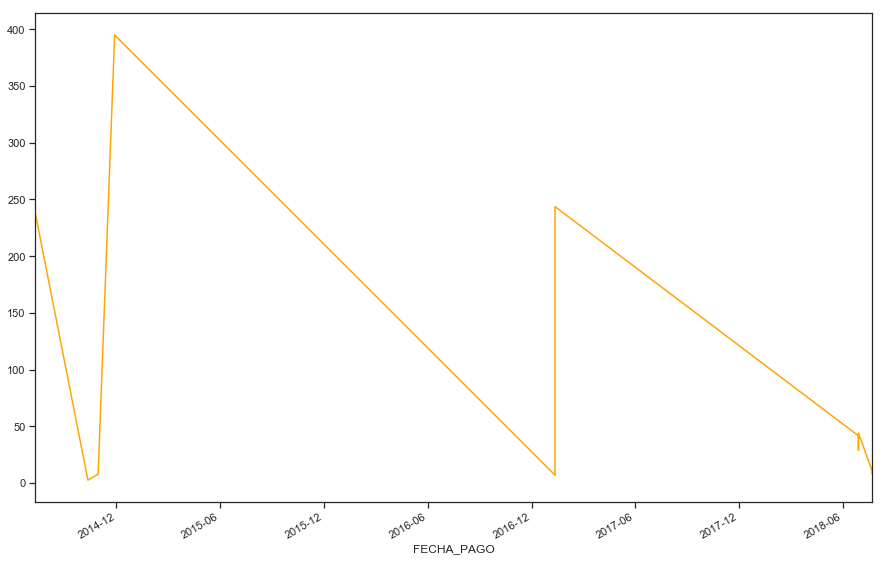

In [15]:
# Tracking payments on debt paid with cuota 90
sorted_90['MCC_IMPORTE'].plot(color='orange')

# Graph all the different cuota types at once

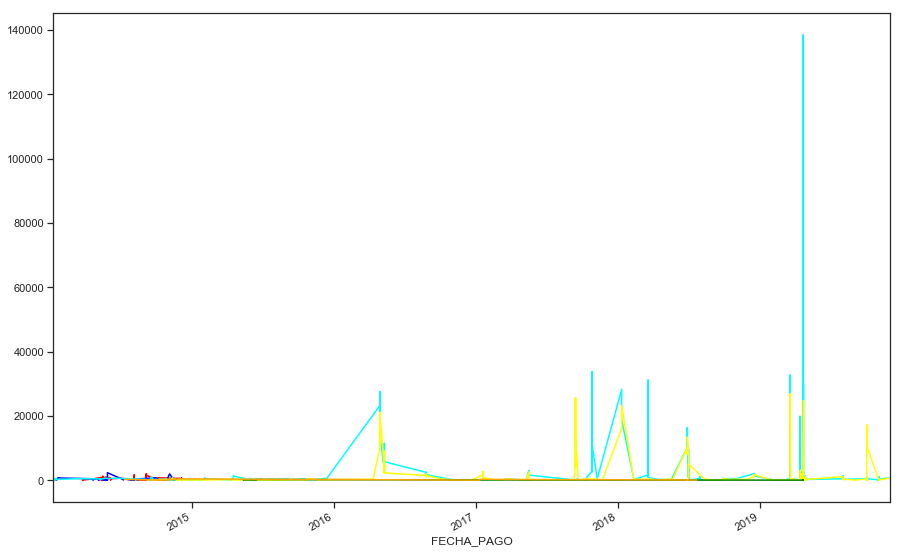

In [38]:
sorted_0['MCC_IMPORTE'].plot(color='red');
sorted_10['2014']['MCC_IMPORTE'].plot(color='blue');
sorted_20['MCC_IMPORTE'].plot(color='cyan');
sorted_50['MCC_IMPORTE'].plot(color='yellow');
sorted_51['MCC_IMPORTE'].plot(color='green');
sorted_90['MCC_IMPORTE'].plot(color='orange')

# how did people pay in 2014?

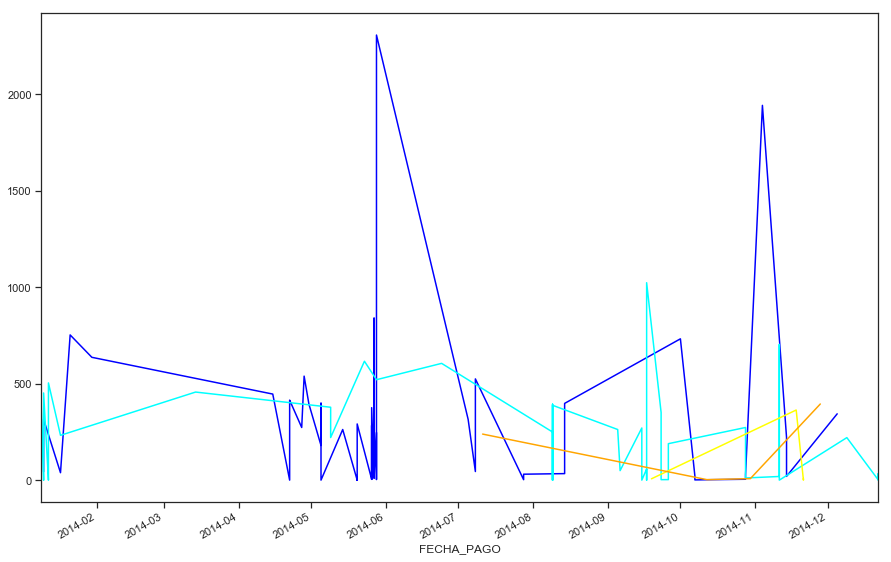

In [41]:
# it looks like nobody paid with cuota 0 after 2014, so let's just look at 2014 (CUOTA 51 didn't exist at that time)
sorted_10['2014']['MCC_IMPORTE'].plot(color='blue');
sorted_20['2014']['MCC_IMPORTE'].plot(color='cyan');
sorted_50['2014']['MCC_IMPORTE'].plot(color='yellow');
sorted_90['2014']['MCC_IMPORTE'].plot(color='orange')

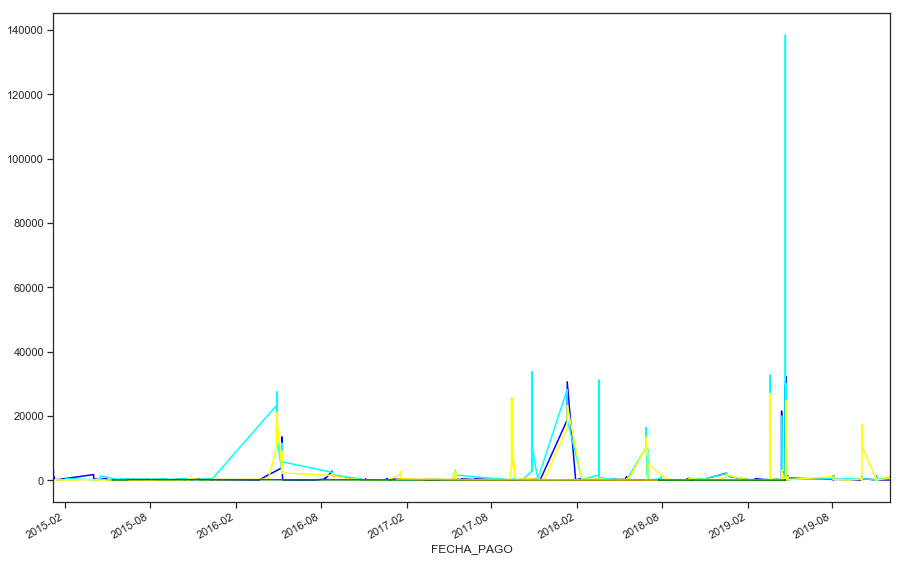

In [36]:
# the others (but only from 2015 on)
sorted_10['2015':]['MCC_IMPORTE'].plot(color='blue');
sorted_20['2015':]['MCC_IMPORTE'].plot(color='cyan');
sorted_50['2015':]['MCC_IMPORTE'].plot(color='yellow');
sorted_51['2015':]['MCC_IMPORTE'].plot(color='green');
sorted_90['2015':]['MCC_IMPORTE'].plot(color='orange')

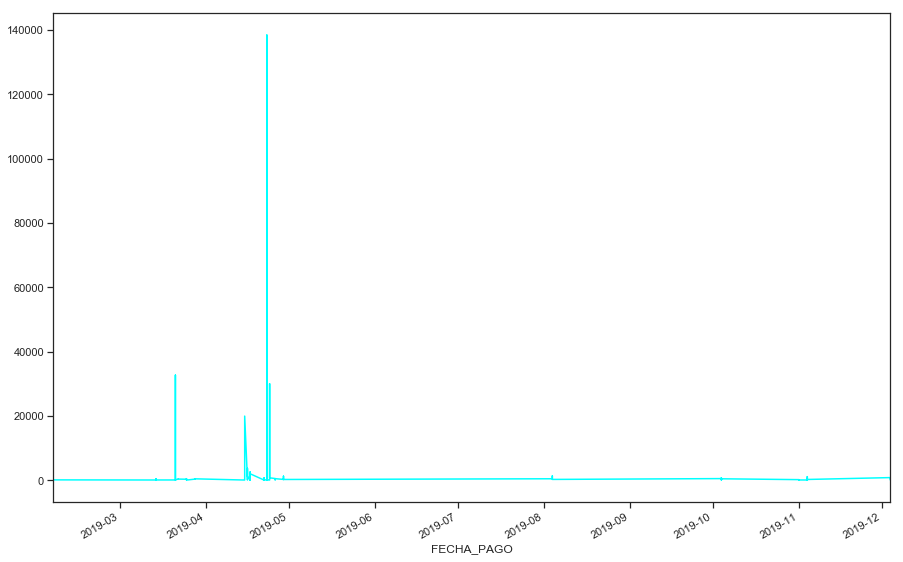

In [28]:
# What happened in 2019 with that high value?
sorted_20['2019':]['MCC_IMPORTE'].plot(color='cyan');

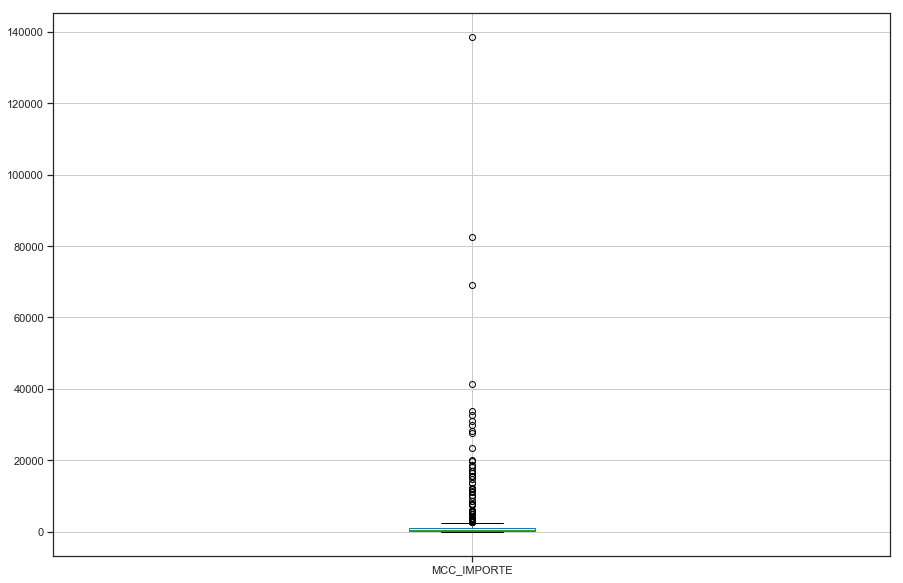

In [27]:
sorted_20.boxplot(column='MCC_IMPORTE');